# Question 1

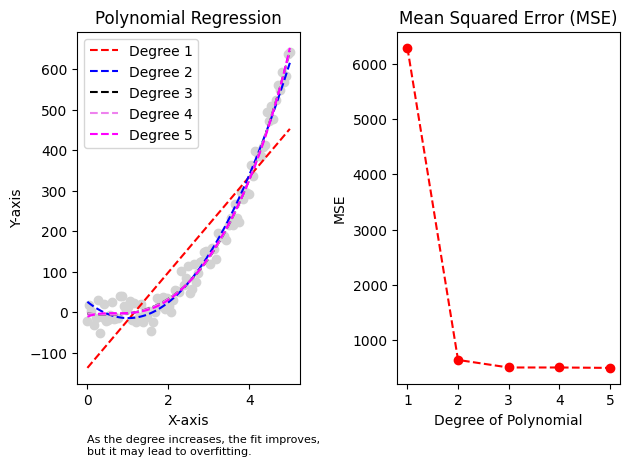

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# I) Generate data
n = 100
np.random.seed(123)
x = np.linspace(0, 5, n)
b0 = -1
b1 = -10
b2 = 3
b3 = 5
sigma = 20
y = b0 + b1 * x + b2 * (x**2) + b3 * (x**3) + np.random.normal(0, sigma, n)

# Plot the data points
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='lightgrey')

# II) Polynomial regression and plot
colors = ['red', 'blue', 'black', 'violet', 'magenta']
MSE = []
for i in range(5):
    coeff = np.polyfit(x, y, i + 1)
    pred_y = np.polyval(coeff, x)
    mse = np.sum(((y - pred_y)**2) / n)
    MSE.append(mse)
    plt.plot(x, pred_y, color=colors[i], linestyle='--', label=f'Degree {i + 1}')
    
plt.legend()

# Display an explanation of the polynomial fit
plt.title("Polynomial Regression")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.text(0,-350, "As the degree increases, the fit improves,\nbut it may lead to overfitting.", fontsize=8)

# III) Plot the Mean Squared Error (MSE)
plt.subplot(1, 2, 2)
plt.plot(list(range(1, 6)), MSE, color='red', marker='o', linestyle = '--')
plt.title("Mean Squared Error (MSE)")
plt.xlabel("Degree of Polynomial")
plt.ylabel("MSE")

# Display the plots
plt.tight_layout()
plt.show()



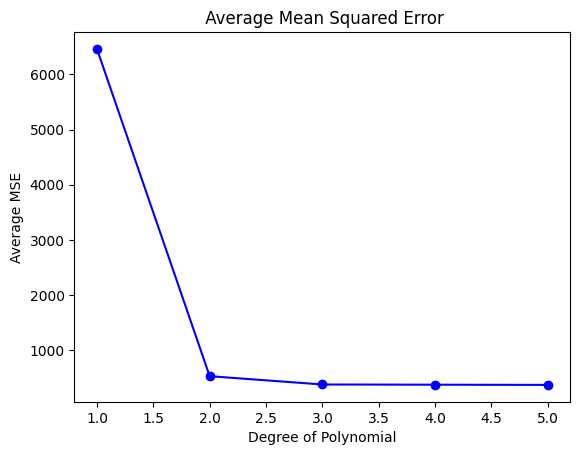

In [3]:
# IV)

import numpy as np
import matplotlib.pyplot as plt

M = 1000
MSE = []
for _ in range(M):
    n = 100
    x = np.linspace(0, 5, n)
    b0 = -1
    b1 = -10
    b2 = 3
    b3 = 5
    sigma = 20
    y = b0 + b1 * x + b2 * (x**2) + b3 * (x**3) + np.random.normal(0, sigma, n)
    
    for i in range(5):
            coeff = np.polyfit(x, y, i + 1)
            pred_y = np.polyval(coeff, x)
            mse = np.sum(((y - pred_y)**2) / n)
            MSE.append(mse)

MSE = np.array(MSE).reshape(1000,5)
avg_MSE = ( np.sum(MSE, axis = 0) )/M

plt.plot(list(range(1, 6)), avg_MSE, color='blue', marker='o')
plt.title(" Average Mean Squared Error")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Average MSE")

# Display the plots
# plt.tight_layout()
plt.show()





# Question 2

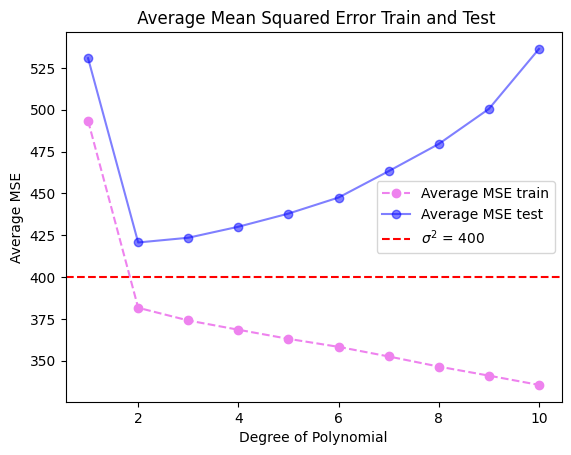

In [4]:
# I,II & III)
import numpy as np
import matplotlib.pyplot as plt

no_of_p = 10
M = 1000
MSE_train_all = []
MSE_test_all = []
for _ in range(M):
    n = 100
    x = np.linspace(0,2.5, n)
    sampled_indices = np.random.choice(n, size=int(0.7 * n), replace=False)
    # Split the array into two parts based on the sampled indices
    x_train = np.sort(x[sampled_indices])
    x_test = np.sort(np.delete(x, sampled_indices))

    b0 = -1
    b1 = -10
    b2 = 3
    b3 = 5
    sigma = 20

    y_train = b0 + b1 * x_train + b2 * (x_train**2) + b3 * (x_train**3) + np.random.normal(0, sigma, len(x_train))
    y_test = b0 + b1 * x_test + b2 * (x_test**2) + b3 * (x_test**3) + np.random.normal(0, sigma, len(x_test))

    MSE_train = []
    MSE_test = []
    for i in range(no_of_p):
            coeff = np.polyfit(x_train, y_train, i + 1)
            pred_y_train = np.polyval(coeff, x_train)
            pred_y_test = np.polyval(coeff, x_test)
            mse_train = np.sum(((y_train - pred_y_train)**2) / len(x_train))
            mse_test = np.sum(((y_test - pred_y_test)**2) / len(x_test))
            MSE_train.append(mse_train)
            MSE_test.append(mse_test)
    MSE_train_all.extend(MSE_train)
    MSE_test_all.extend(MSE_test)

MSE_train_all = np.array(MSE_train_all).reshape(M,no_of_p)
avg_MSE_train = ( np.sum(MSE_train_all, axis = 0) )/M

MSE_test_all = np.array(MSE_test_all).reshape(M,no_of_p)
avg_MSE_test = ( np.sum(MSE_test_all, axis = 0) )/M

plt.plot(list(range(1, no_of_p+1)), avg_MSE_train, color='violet', marker='o',linestyle = '--',label = 'Average MSE train')
plt.plot(list(range(1,no_of_p+1)), avg_MSE_test, color = 'blue', marker='o',label = 'Average MSE test',alpha = 0.5)
plt.title(" Average Mean Squared Error Train and Test")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Average MSE")
plt.axhline(y=sigma**2, color='red', linestyle='--', label= f'$\\sigma^2$ = {sigma**2}')

# Display the plots
# plt.tight_layout()
plt.legend()
plt.show()








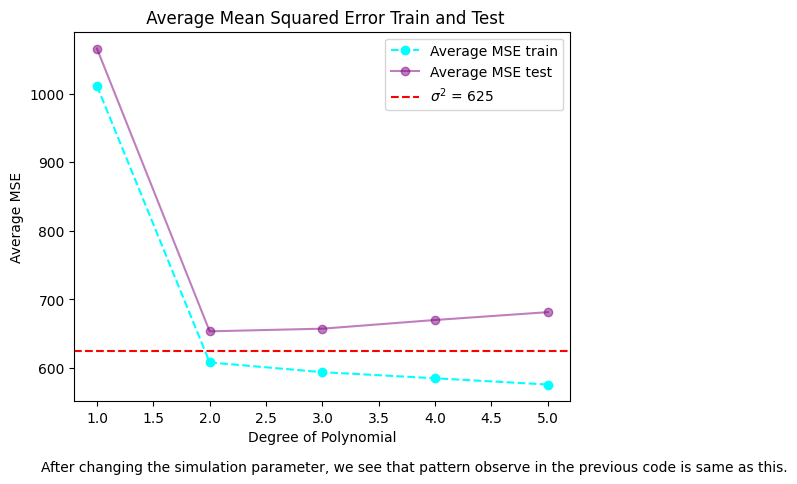

In [5]:
# IV) changing the simulation parameter

import numpy as np
import matplotlib.pyplot as plt

no_of_p = 5
M = 1000
MSE_train_all = []
MSE_test_all = []
for _ in range(M):
    n = 100
    x = np.linspace(0,5, n)
    sampled_indices = np.random.choice(n, size=int(0.7 * n), replace=False)
    # Split the array into two parts based on the sampled indices
    x_train = np.sort(x[sampled_indices])
    x_test = np.sort(np.delete(x, sampled_indices))

    b0 = -10
    b1 = -10
    b2 = 3
    b3 = 1
    sigma = 25

    y_train = b0 + b1 * x_train + b2 * (x_train**2) + b3 * (x_train**3) + np.random.normal(0, sigma, len(x_train))
    y_test = b0 + b1 * x_test + b2 * (x_test**2) + b3 * (x_test**3) + np.random.normal(0, sigma, len(x_test))

    MSE_train = []
    MSE_test = []
    for i in range(no_of_p):
            coeff = np.polyfit(x_train, y_train, i + 1)
            pred_y_train = np.polyval(coeff, x_train)
            pred_y_test = np.polyval(coeff, x_test)
            mse_train = np.sum(((y_train - pred_y_train)**2) / len(x_train))
            mse_test = np.sum(((y_test - pred_y_test)**2) / len(x_test))
            MSE_train.append(mse_train)
            MSE_test.append(mse_test)
    MSE_train_all.extend(MSE_train)
    MSE_test_all.extend(MSE_test)

MSE_train_all = np.array(MSE_train_all).reshape(M,no_of_p)
avg_MSE_train = ( np.sum(MSE_train_all, axis = 0) )/M

MSE_test_all = np.array(MSE_test_all).reshape(M,no_of_p)
avg_MSE_test = ( np.sum(MSE_test_all, axis = 0) )/M

plt.plot(list(range(1, no_of_p+1)), avg_MSE_train, color='cyan', marker='o',linestyle = '--',label = 'Average MSE train')
plt.plot(list(range(1,no_of_p+1)), avg_MSE_test, color = 'purple', marker='o',label = 'Average MSE test',alpha = 0.5)
plt.title(" Average Mean Squared Error Train and Test")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Average MSE")
plt.axhline(y=sigma**2, color='red', linestyle='--', label= f'$\\sigma^2$ = {sigma**2}')
plt.text(0.5,450, "After changing the simulation parameter, we see that pattern observe in the previous code is same as this.", fontsize=10)

# Display the plots
# plt.tight_layout()
plt.legend()
plt.show()









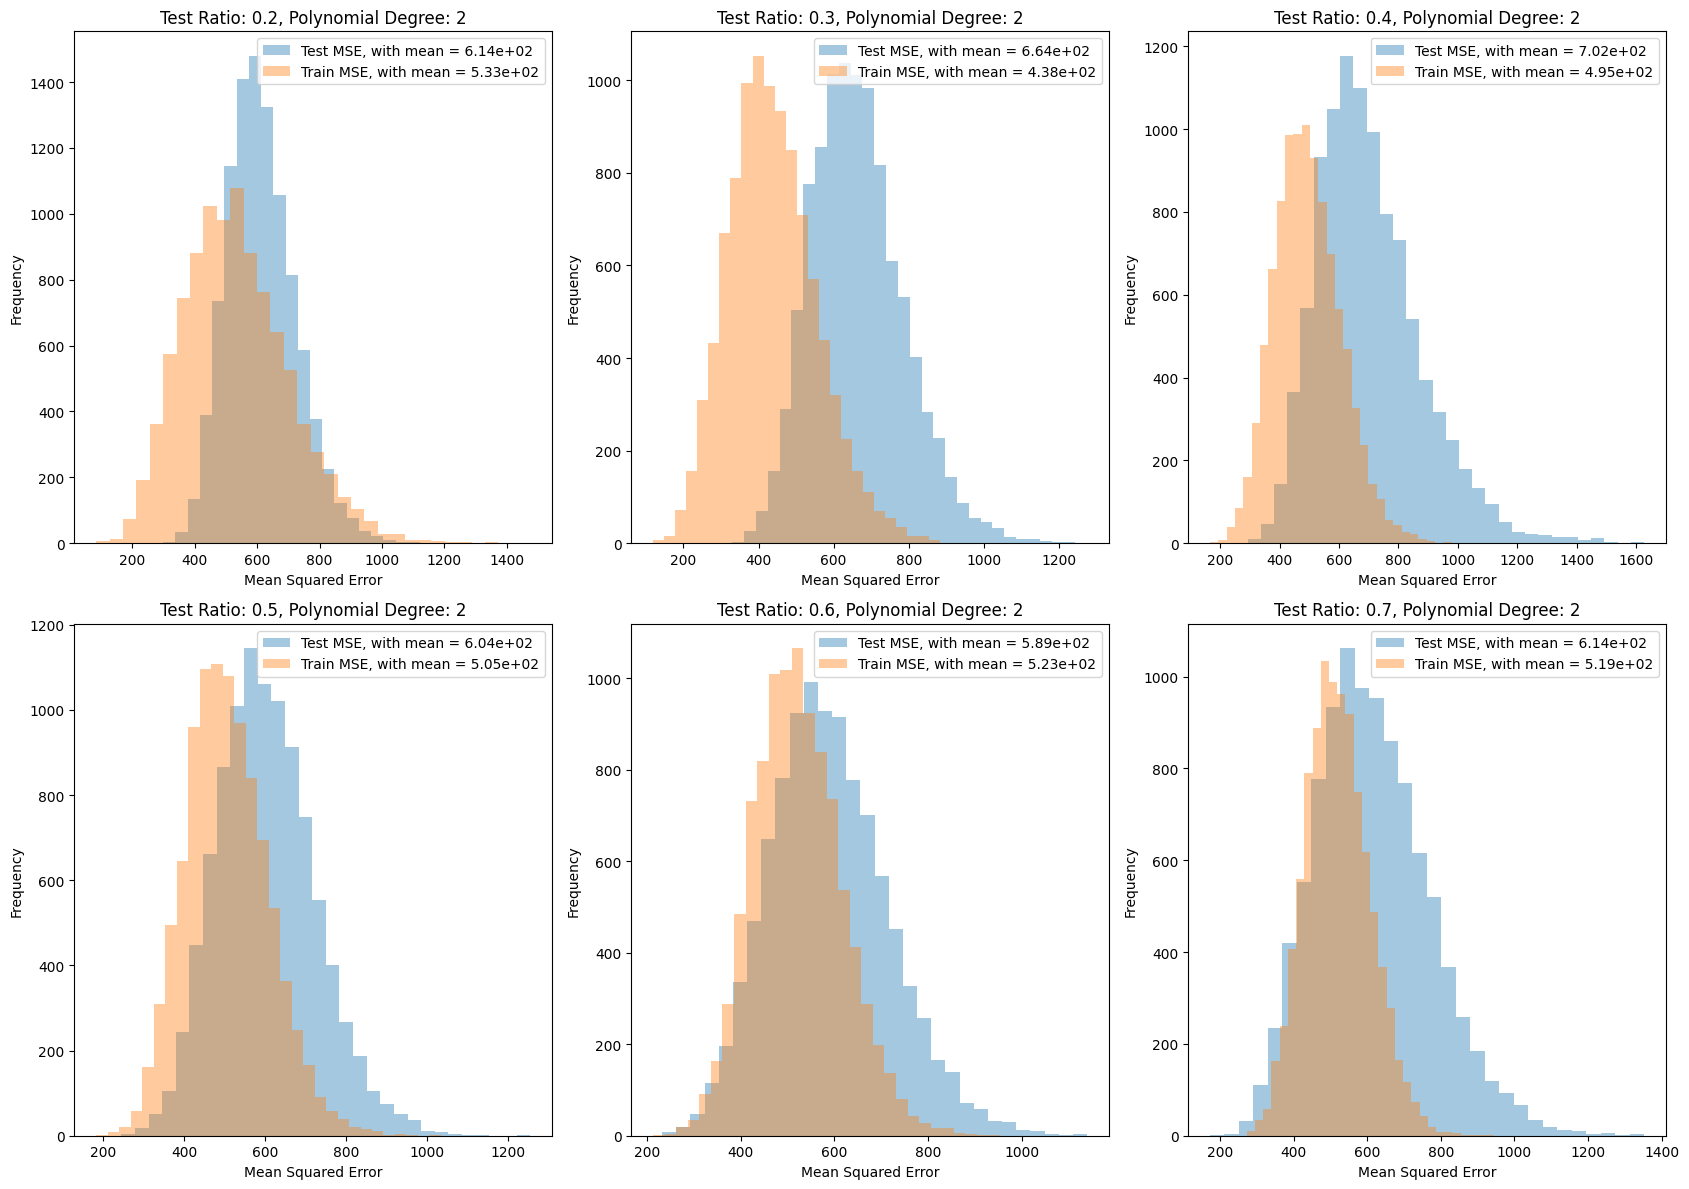

From the above histogram we can conclude that test ratio greater than equal to 0.5 would be the better choice for accurate prediction.


In [64]:
# V) Adressing the part 5th of the question.

import numpy as np
import matplotlib.pyplot as plt

# Set the number of simulations
M = 10000

# Define different ratios
list_values = [0.2, 0.3, 0.4,0.5,0.6, 0.7]

# Create a figure with subplots
plt.figure(figsize=(17, 12))

# Loop through different ratios
for i, ratio in enumerate(list_values):
    n = 100
    x = np.linspace(0, 5, n)
    sampled_indices = np.random.choice(n, size=int(ratio * n), replace=False)
    MSE_test = []
    MSE_train = []

    # Run simulations
    for _ in range(M):
        # Generate training and test sets
        x_train = np.sort(x[sampled_indices])
        x_test = np.sort(np.delete(x, sampled_indices))

        b0, b1, b2, b3 = -1, -10, 3, 5
        sigma = 20

        # Generate training and test data with noise
        y_train = b0 + b1 * x_train + b2 * (x_train ** 2) + b3 * (x_train ** 3) + np.random.normal(0, sigma, len(x_train))
        y_test = b0 + b1 * x_test + b2 * (x_test ** 2) + b3 * (x_test ** 3) + np.random.normal(0, sigma, len(x_test))

        # Fit a polynomial regression model of degree 2
        coeff = np.polyfit(x_train, y_train, 2)
        pred_y_test = np.polyval(coeff, x_test)
        pred_y_train = np.polyval(coeff, x_train)
        mse_train = np.mean((y_train - pred_y_train)**2)
        mse_test = np.mean((y_test - pred_y_test)**2)

        MSE_test.append(mse_test)
        MSE_train.append(mse_train)

    # Calculate mean MSE values
    mean_test = np.mean(MSE_test)
    mean_train = np.mean(MSE_train)

    
    plt.subplot(2, 3, i + 1)
    
    
    mse_exp_test = "{:.2e}".format(mean_test)
    mse_exp_train = "{:.2e}".format(mean_train)
    
    
    plt.hist(MSE_test, alpha=0.4, bins=30, label= f'Test MSE, with mean = {mse_exp_test}')
    plt.hist(MSE_train, alpha=0.4, bins=30, label= f'Train MSE, with mean = {mse_exp_train}')
    
    
    plt.title(f'Test Ratio: {ratio}, Polynomial Degree: {len(coeff) - 1}')
    plt.xlabel('Mean Squared Error')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()

plt.show()

print('\033[1mFrom the above histogram we can conclude that test ratio greater than equal to 0.5 would be the better choice for accurate prediction.\033[0m')


In [ ]:
# was doing today(06-05-2025)

In [2]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Generate data with 5 features (only 2 are important)
np.random.seed(42)
X = np.random.randn(100, 5)
y = 2 * X[:, 0] + 1.5 * X[:, 1] + np.random.randn(100)  # Only X0 and X1 matter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
lasso = Lasso(alpha=0.1)  # alpha = λ (regularization strength)
lasso.fit(X_train, y_train)

print("Coefficients:", lasso.coef_)  # Some should be zero!

Coefficients: [ 1.85147967  1.55928521 -0.          0.02391728  0.02160733]


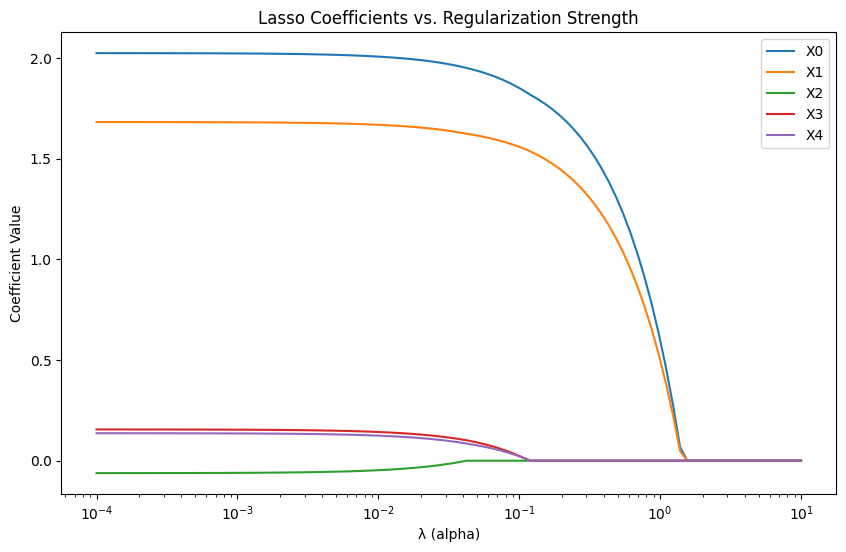

In [10]:
import matplotlib.pyplot as plt

alphas = np.logspace(-4, 1, 100)  # λ values from 0.0001 to 10
coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("λ (alpha)")
plt.ylabel("Coefficient Value")
plt.title("Lasso Coefficients vs. Regularization Strength")
plt.legend([f"X{i}" for i in range(5)])
plt.show()